In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import numpy as np
import re
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
import os
import gdown
import zipfile
drive_link = "https://drive.google.com/file/d/1c7SdfclbQ2QxxUvNSeZaq8lgEJh0jj7A/view?usp=sharing"
file_id = drive_link.split("/")[-2]
zip_download_dir = "data.zip"
unzip_dir = "extracted_data"

# Download file
gdown.download(f"https://drive.google.com/uc?export=download&id={file_id}", zip_download_dir, quiet=False)

# Extract ZIP file
os.makedirs(unzip_dir, exist_ok=True)
with zipfile.ZipFile(zip_download_dir, 'r') as zip_ref:
    zip_ref.extractall(unzip_dir)

print(f"File downloaded and extracted to: {unzip_dir}")


Downloading...
From (original): https://drive.google.com/uc?export=download&id=1c7SdfclbQ2QxxUvNSeZaq8lgEJh0jj7A
From (redirected): https://drive.google.com/uc?export=download&id=1c7SdfclbQ2QxxUvNSeZaq8lgEJh0jj7A&confirm=t&uuid=098bd0e5-0aa8-4f6a-a397-060cb697d509
To: /content/data.zip
100%|██████████| 43.1M/43.1M [00:00<00:00, 64.7MB/s]


File downloaded and extracted to: extracted_data


In [ ]:
true = pd.read_csv("/content/extracted_data/Fake News/Fake.csv")
fake = pd.read_csv("/content/extracted_data/Fake News/True.csv")

In [ ]:
true.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [ ]:
fake.head()

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [ ]:
true['class'] = 1
fake['class'] = 0

In [ ]:
true.shape

(23481, 5)

In [ ]:
news_df = pd.concat([fake, true], axis=0).reset_index(drop=True)

In [ ]:
news_df.head()

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


# About the Dataset:

id: unique id for a news article                                     
title: the title of a news article                                  
author: author of the news article                                    
text: the text of the article; could be incomplete                                        
label: a label that marks whether the news article is real or fake:                              
    1: Fake news                                                 
    0: real News                                        

# 1 Preprocessing

In [ ]:
news_df.shape

(44898, 5)

In [ ]:
news_df['content'] = news_df['title']+' '+news_df['text']

In [ ]:
news_df

,title,text,subject,date,class,content
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0,"As U.S. budget fight looms, Republicans flip t..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0,U.S. military to accept transgender recruits o...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0,Senior U.S. Republican senator: 'Let Mr. Muell...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0,FBI Russia probe helped by Australian diplomat...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0,Trump wants Postal Service to charge 'much mor...
...,...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",1,McPain: John McCain Furious That Iran Treated ...
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",1,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",1,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",1,How to Blow $700 Million: Al Jazeera America F...


In [ ]:
fake.shape

(21417, 5)

In [ ]:
news_df = news_df.iloc[21017:21817].reset_index(drop=True)

In [ ]:
news_df.shape

(800, 6)

In [ ]:
news_df

,title,text,subject,date,class,content
0,China's Xi says BRICS countries should deepen ...,"XIAMEN, China (Reuters) - BRICS countries shou...",worldnews,"September 5, 2017",0,China's Xi says BRICS countries should deepen ...
1,Report on Mexican attorney general's Ferrari d...,MEXICO CITY (Reuters) - A report that Mexico s...,worldnews,"September 5, 2017",0,Report on Mexican attorney general's Ferrari d...
2,North Korea seen moving ICBM-grade rocket towa...,SEOUL (Reuters) - North Korea has been observe...,worldnews,"September 5, 2017",0,North Korea seen moving ICBM-grade rocket towa...
3,Brazil prosecutor says new audio threatens Bat...,BRASILIA (Reuters) - A leniency deal struck be...,worldnews,"September 4, 2017",0,Brazil prosecutor says new audio threatens Bat...
4,Voice of triumph or doom: North Korean present...,SEOUL (Reuters) - Wearing a pink Korean dress ...,worldnews,"September 4, 2017",0,Voice of triumph or doom: North Korean present...
...,...,...,...,...,...,...
795,A Florida Pizza Hut To Irma-Fleeing Employees...,Residents in Florida who work at a Pizza Hut w...,News,"September 11, 2017",1,A Florida Pizza Hut To Irma-Fleeing Employees...
796,Never Forget: Donald Trump Bragged About Havi...,I ll bet if you go to your kitchen and look at...,News,"September 11, 2017",1,Never Forget: Donald Trump Bragged About Havi...
797,Fox News Just Compared Slave Owners To 9/11 V...,Nobody can accuse Fox News of being sane most ...,News,"September 11, 2017",1,Fox News Just Compared Slave Owners To 9/11 V...
798,Trump Praises Coast Guard’s Hurricane Relief ...,Leave it to Donald Trump to disrespect both th...,News,"September 10, 2017",1,Trump Praises Coast Guard’s Hurricane Relief ...


# separating the data & label

In [ ]:
X = news_df.drop('class',axis=1)
y = news_df['class']

In [ ]:
print(X)

                                                 title  \
0    China's Xi says BRICS countries should deepen ...   
1    Report on Mexican attorney general's Ferrari d...   
2    North Korea seen moving ICBM-grade rocket towa...   
3    Brazil prosecutor says new audio threatens Bat...   
4    Voice of triumph or doom: North Korean present...   
..                                                 ...   
795   A Florida Pizza Hut To Irma-Fleeing Employees...   
796   Never Forget: Donald Trump Bragged About Havi...   
797   Fox News Just Compared Slave Owners To 9/11 V...   
798   Trump Praises Coast Guard’s Hurricane Relief ...   
799   Florida GOP Official Tried To Murder A Teen W...   

                                                  text    subject  \
0    XIAMEN, China (Reuters) - BRICS countries shou...  worldnews   
1    MEXICO CITY (Reuters) - A report that Mexico s...  worldnews   
2    SEOUL (Reuters) - North Korea has been observe...  worldnews   
3    BRASILIA (Reuters) - A

In [ ]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
795    1
796    1
797    1
798    1
799    1
Name: class, Length: 800, dtype: int64


In [ ]:
news_df['content']

,content
0,China's Xi says BRICS countries should deepen ...
1,Report on Mexican attorney general's Ferrari d...
2,North Korea seen moving ICBM-grade rocket towa...
3,Brazil prosecutor says new audio threatens Bat...
4,Voice of triumph or doom: North Korean present...
...,...
795,A Florida Pizza Hut To Irma-Fleeing Employees...
796,Never Forget: Donald Trump Bragged About Havi...
797,Fox News Just Compared Slave Owners To 9/11 V...
798,Trump Praises Coast Guard’s Hurricane Relief ...


# Stemming:   lemmatization

> Add blockquote



Stemming is the process of reducing a word to its Root word

example: hung         hanged        hanging ======hang

# Steps:
lower case                 
splitting                             
removing stopwords                              
stemming                                   

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
i = 0
def lemmatization(content):
    global i
    if i % 100 == 0:
        print(i)
    i += 1
    content = re.sub('[^a-zA-Z]', ' ', content).lower().split()
    content = [lemmatizer.lemmatize(word) for word in content if word not in stopwords.words('english')]
    return ' '.join(content)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
news_df['content'] = news_df['content'].apply(lemmatization )

0
100
200
300
400
500
600
700


In [ ]:
news_df.shape

(800, 6)

In [ ]:
news_df.head()

,title,text,subject,date,class,content
0,China's Xi says BRICS countries should deepen ...,"XIAMEN, China (Reuters) - BRICS countries shou...",worldnews,"September 5, 2017",0,china xi say brics country deepen coordination...
1,Report on Mexican attorney general's Ferrari d...,MEXICO CITY (Reuters) - A report that Mexico s...,worldnews,"September 5, 2017",0,report mexican attorney general ferrari drive ...
2,North Korea seen moving ICBM-grade rocket towa...,SEOUL (Reuters) - North Korea has been observe...,worldnews,"September 5, 2017",0,north korea seen moving icbm grade rocket towa...
3,Brazil prosecutor says new audio threatens Bat...,BRASILIA (Reuters) - A leniency deal struck be...,worldnews,"September 4, 2017",0,brazil prosecutor say new audio threatens bati...
4,Voice of triumph or doom: North Korean present...,SEOUL (Reuters) - Wearing a pink Korean dress ...,worldnews,"September 4, 2017",0,voice triumph doom north korean presenter back...


In [ ]:
X = news_df['content']
y = news_df['class']

In [ ]:
X.shape

(800,)

In [ ]:
y

,class
0,0
1,0
2,0
3,0
4,0
...,...
795,1
796,1
797,1
798,1


In [ ]:
X

,content
0,china xi say brics country deepen coordination...
1,report mexican attorney general ferrari drive ...
2,north korea seen moving icbm grade rocket towa...
3,brazil prosecutor say new audio threatens bati...
4,voice triumph doom north korean presenter back...
...,...
795,florida pizza hut irma fleeing employee discip...
796,never forget donald trump bragged tallest buil...
797,fox news compared slave owner victim seriously...
798,trump praise coast guard hurricane relief wron...


In [ ]:
!pip install catboost

This section defines a dictionary of classification models for training. Each model is initialized with default hyperparameters.

## **Model Dictionary (`model_dict`)**
The `model_dict` stores classification models from libraries like Scikit-Learn, XGBoost, and CatBoost, enabling easy iteration and comparison.

### **Included Models**
- **Logistic Regression**: A linear model for binary classification.
- **SVC**: Support vector machine with probability estimation.
- **Ridge Classifier**: A linear model with L2 regularization.
- **Decision Tree**: A tree-based classifier for non-linear data.
- **Random Forest**: An ensemble of decision trees.
- **Extra Trees**: Similar to Random Forest but with more randomness.
- **Gradient Boosting**: Sequential tree-based boosting.
- **AdaBoost**: Boosting algorithm that combines weak classifiers.
- **MLP Classifier**: Neural network-based classifier (500 iterations).
- **XGBoost**: Efficient gradient boosting with log-loss metric.
- **CatBoost**: Gradient boosting optimized for categorical features.
- **KNN (K=5)**: Distance-based classifier with `k=5` neighbors.
- **GaussianNB**: Probabilistic classifier using Gaussian distribution.
- **MultinomialNB**: Naïve Bayes for multinomially distributed data.
- **BernoulliNB**: Naïve Bayes for binary features.


Some models (e.g. `SVC`, `XGBoost`, `CatBoost`) have specific optimizations.



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [ ]:
# Define models
model_dict = {
    'Logistic Regression': LogisticRegression(),
    'SVC': SVC(probability=True),
    'Ridge Classifier': RidgeClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'MLP Classifier': MLPClassifier(max_iter=500),
    'XGBoost': XGBClassifier(eval_metric='logloss'),
    # 'LightGBM': LGBMClassifier(),
    'CatBoost': CatBoostClassifier(verbose=0),
    'KNN (K=5)': KNeighborsClassifier(n_neighbors=5),
    'GaussianNB': GaussianNB(),
    'MultinomialNB': MultinomialNB(),
    'BernoulliNB': BernoulliNB()
}


- **Splits the dataset** into training (80%) and testing (20%) sets.  
- **Uses `train_test_split`** from Scikit-Learn.  
- **`random_state=20`** ensures reproducibility.  
- **Replace `X` and `y`** with actual feature and target variables.

In [ ]:
# Load dataset (Replace with actual dataset)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

# Model Training and Evaluation Pipeline

This script evaluates classification models using a pipeline with TF-IDF vectorization and classifiers. Models are trained, tested, and evaluated based on key metrics.

## **Pipeline Components**
1. **TF-IDF Vectorizer**: Converts text to numerical features, removing stop words.
2. **Sparse to Dense Conversion**: Ensures model compatibility.
3. **Classifier Dictionary**: Contains models for evaluation.

## **Evaluation Metrics**
- **Accuracy**: Measures correctness.
- **Precision**: True positive ratio.
- **Recall**: Identifies all positives.
- **F1-score**: Balance of precision and recall.


In [ ]:
from sklearn.preprocessing import FunctionTransformer

# Store results
results = []

for model_name, model in model_dict.items():
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(stop_words='english')),
        ('to_dense', FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)),
        ('classifier', model)
    ])

    pipeline.fit(X_train, Y_train)
    Y_pred = pipeline.predict(X_test)

    # Compute classification metrics
    accuracy = round(accuracy_score(Y_test, Y_pred) * 100, 2)
    precision = round(precision_score(Y_test, Y_pred, zero_division=0), 2)
    recall = round(recall_score(Y_test, Y_pred, zero_division=0), 2)
    f1 = round(f1_score(Y_test, Y_pred, zero_division=0), 2)

    # Append results
    results.append({'Model': model_name, 'Accuracy (%)': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1})



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:12:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              Model  Accuracy (%)  Precision  Recall  F1-score
Logistic Regression        100.00       1.00    1.00      1.00
                SVC        100.00       1.00    1.00      1.00
   Ridge Classifier        100.00       1.00    1.00      1.00
      Decision Tree         99.38       1.00    0.99      0.99
      Random Forest         99.38       0.99    1.00      0.99
        Extra Trees        100.00       1.00    1.00      1.00
  Gradient Boosting         99.38       1.00    0.99      0.99
           AdaBoost        100.00       1.00    1.00      1.00
     MLP Classifier        100.00       1.00    1.00      1.00
            XGBoost         99.38       1.00    0.99      0.99
           CatBoost         99.38       1.00    0.99      0.99
          KNN (K=5)         98.12       0.97    0.99      0.98
         GaussianNB         95.00       0.93    0.97      0.95
      MultinomialNB        100.00       1.00    1.00      1.00
        BernoulliNB        100.00       1.00    1.00   

In [ ]:
# Convert to DataFrame and print as a table
results_df = pd.DataFrame(results)
print(results_df.to_string(index=False))

              Model  Accuracy (%)  Precision  Recall  F1-score
Logistic Regression        100.00       1.00    1.00      1.00
                SVC        100.00       1.00    1.00      1.00
   Ridge Classifier        100.00       1.00    1.00      1.00
      Decision Tree         99.38       1.00    0.99      0.99
      Random Forest         99.38       0.99    1.00      0.99
        Extra Trees        100.00       1.00    1.00      1.00
  Gradient Boosting         99.38       1.00    0.99      0.99
           AdaBoost        100.00       1.00    1.00      1.00
     MLP Classifier        100.00       1.00    1.00      1.00
            XGBoost         99.38       1.00    0.99      0.99
           CatBoost         99.38       1.00    0.99      0.99
          KNN (K=5)         98.12       0.97    0.99      0.98
         GaussianNB         95.00       0.93    0.97      0.95
      MultinomialNB        100.00       1.00    1.00      1.00
        BernoulliNB        100.00       1.00    1.00   

In [ ]:
# Print results as a formatted table
from tabulate import tabulate
print(tabulate(results_df, headers='keys', tablefmt='pretty'))

+----+---------------------+--------------+-----------+--------+----------+
|    |        Model        | Accuracy (%) | Precision | Recall | F1-score |
+----+---------------------+--------------+-----------+--------+----------+
| 0  | Logistic Regression |    100.0     |    1.0    |  1.0   |   1.0    |
| 1  |         SVC         |    100.0     |    1.0    |  1.0   |   1.0    |
| 2  |  Ridge Classifier   |    100.0     |    1.0    |  1.0   |   1.0    |
| 3  |    Decision Tree    |    99.38     |    1.0    |  0.99  |   0.99   |
| 4  |    Random Forest    |    99.38     |   0.99    |  1.0   |   0.99   |
| 5  |     Extra Trees     |    100.0     |    1.0    |  1.0   |   1.0    |
| 6  |  Gradient Boosting  |    99.38     |    1.0    |  0.99  |   0.99   |
| 7  |      AdaBoost       |    100.0     |    1.0    |  1.0   |   1.0    |
| 8  |   MLP Classifier    |    100.0     |    1.0    |  1.0   |   1.0    |
| 9  |       XGBoost       |    99.38     |    1.0    |  0.99  |   0.99   |
| 10 |      

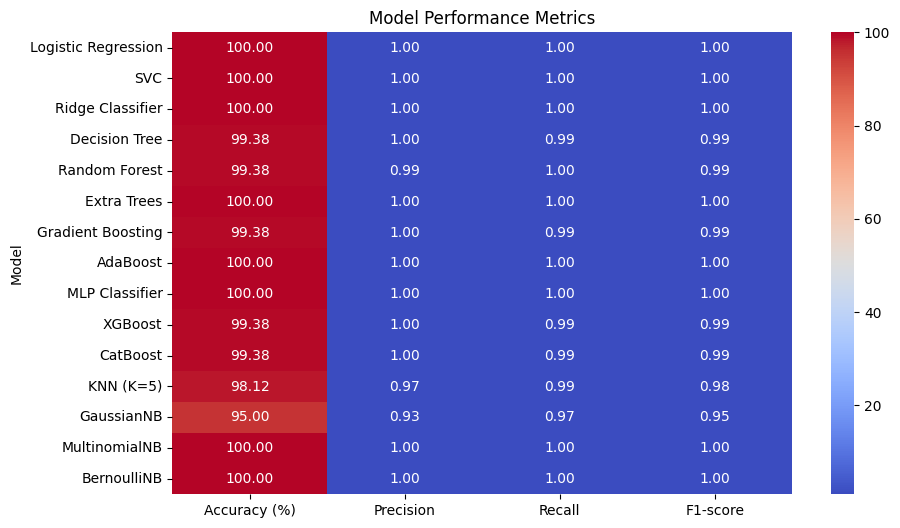

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(results_df.set_index("Model"), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Model Performance Metrics")
plt.show()

In [ ]:
from tabulate import tabulate
results_df.to_csv('results.csv', index=False)


In [ ]:
input_data = pipeline.named_steps['tfidf'].transform([X_test[10]])
prediction = model.predict(input_data)

In [ ]:
prediction[0]

0

In [ ]:
if prediction[0] == 1:
    print('The News Is Real')
else:
    print('The News is Fake')

The News is Fake


In [ ]:
news_df['content'][10]

'small german party fight third place possibly power tv debate berlin reuters leading candidate germany smaller party locked horn migration security foreign policy television debate monday came less three week federal election third placed party could turn kingmaker clash followed debate centre right chancellor angela merkel social democrat spd challenger martin schulz sunday hardly difference emerged stirred speculation run current grand coalition conservative cdu csu bloc spd likely outcome sept vote merkel schulz stressed want avoid scenario poll suggest next government would stable majority another grand coalition tricky three way coalition conservative green business friendly free democrat fdp debate smaller party cem ozdemir green attacked die linke left candidate sahra wagenknecht afd politician alice weidel euroceptic rhetoric anti european populism simply wrong matter come far left far right ozdemir said adding germany benefiting immensely european union easy always blame brus

In [ ]:
import pickle

# Fit the vectorizer on training data
vector = TfidfVectorizer(stop_words='english')
X_train_tfidf = vector.fit_transform(X_train)  # Ensure it's fitted

# Save model and vectorizer
pickle.dump(model, open('model.pkl', 'wb'))
pickle.dump(vector, open('vector.pkl', 'wb'))


In [ ]:
# Load model and vectorizer
model = pickle.load(open('model.pkl', 'rb'))
vector = pickle.load(open('vector.pkl', 'rb'))

# Transform input text and predict
input_text = ["Florida GOP Official Tried To Murder A"]
input_data = vector.transform(input_text)

prediction = model.predict(input_data)
print(prediction)


[1]


<ipython-input-158-b41906a282ca>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy (%)', data=results_df, palette='viridis')


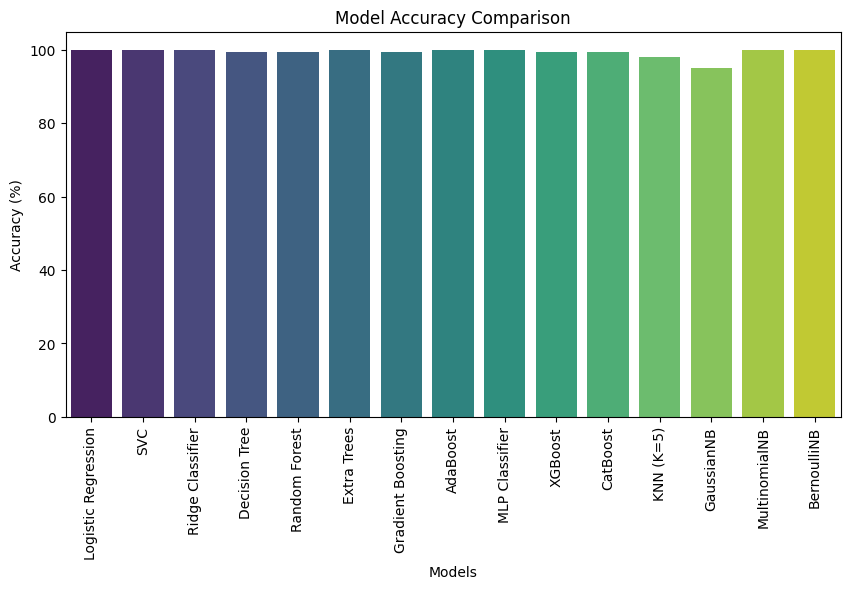

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='Accuracy (%)', data=results_df, palette='viridis')
plt.xticks(rotation=90)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy (%)")
plt.xlabel("Models")
plt.show()


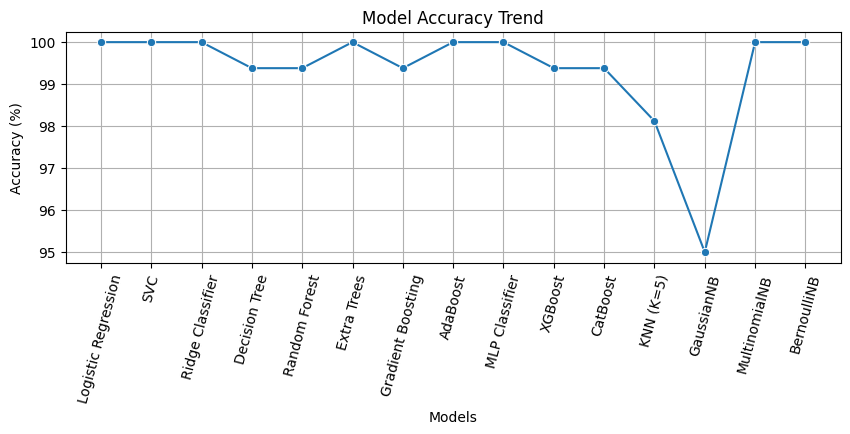

In [ ]:
plt.figure(figsize=(10, 3))
sns.lineplot(x='Model', y='Accuracy (%)', data=results_df, marker='o', linestyle='-')
plt.xticks(rotation=75)
plt.title("Model Accuracy Trend")
plt.ylabel("Accuracy (%)")
plt.xlabel("Models")
plt.grid()
plt.show()


In [ ]:
df = pd.read_csv("results.csv")

In [ ]:
df

,Model,Accuracy (%),Precision,Recall,F1-score
0,Logistic Regression,100.00,1.00,1.00,1.00
1,SVC,100.00,1.00,1.00,1.00
2,Ridge Classifier,100.00,1.00,1.00,1.00
3,Decision Tree,99.38,1.00,0.99,0.99
4,Random Forest,99.38,0.99,1.00,0.99
5,Extra Trees,100.00,1.00,1.00,1.00
6,Gradient Boosting,99.38,1.00,0.99,0.99
7,AdaBoost,100.00,1.00,1.00,1.00
8,MLP Classifier,100.00,1.00,1.00,1.00
9,XGBoost,99.38,1.00,0.99,0.99


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1HQ0NJgbJSlbDJaYYxy-7mWmBpr5gKL14WGNimWzN_NE#gid=0


In [ ]:
YE UPER WALA SHEET NHI DIKH RHA H 👀